# 0.0 Imports

In [5]:
import warnings

import pandas as pd
import numpy as np

from sklearn import metrics as mt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

In [2]:
warnings.filterwarnings('ignore')

# 1.0 Load Dataset

In [3]:
#Data Path
data_path_X_trian = '../regressao/X_training.csv'
data_path_y_trian = '../regressao/y_training.csv'

data_path_X_val = '../regressao/X_validation.csv'
data_path_y_val = '../regressao/y_val.csv'

data_path_X_test = '../regressao/X_test.csv'
data_path_y_test = '../regressao/y_test.csv'

# Train Dataset
X_train = pd.read_csv(data_path_X_trian)
y_train = pd.read_csv(data_path_y_trian)

# Validation Dataset
X_val = pd.read_csv(data_path_X_val)
y_val = pd.read_csv(data_path_y_val)

# Test Dataset
X_test = pd.read_csv(data_path_X_test)
y_test = pd.read_csv(data_path_y_test)

In [4]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# 2.0 Performance

## 2.1 Train Performance

In [6]:
# Define Polynomial Model
poly = PolynomialFeatures()
X_poly_train = poly.fit_transform(X_train)

# Define Ridge Model
poly_ridge = Ridge(random_state=42)
# Fit Model
poly_ridge.fit(X_poly_train, y_train)

# Predict 
y_pred_train = poly_ridge.predict(X_poly_train)

# Performance Metrics
r2_train = mt.r2_score(y_train, y_pred_train)
mse_train = mt.mean_squared_error(y_train, y_pred_train)
rmse_train = mt.mean_squared_error(y_train, y_pred_train, squared= False)
mae_train = mt.mean_absolute_error(y_train, y_pred_train)
mape_train = mt.mean_absolute_percentage_error(y_train, y_pred_train)

print(f"Train R2: {r2_train}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train MAPE: {mape_train}")


Train R2: 0.09317140761274356
Train MSE: 433.47545690992735
Train RMSE: 20.820073412693034
Train MAE: 16.471971837686482
Train MAPE: 8.372689165744587


## 2.2 Validation Performance

In [7]:
# Define Polynomial Model
poly = PolynomialFeatures()
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.fit_transform(X_val)

# Define Ridge Model
poly_ridge = Ridge(random_state=42)
# Fit Model
poly_ridge.fit(X_poly_train, y_train)

# Predict 
y_pred_val = poly_ridge.predict(X_poly_val)

# Performance Metrics
r2_val = mt.r2_score(y_val, y_pred_val)
mse_val = mt.mean_squared_error(y_val, y_pred_val)
rmse_val = mt.mean_squared_error(y_val, y_pred_val, squared= False)
mae_val = mt.mean_absolute_error(y_val, y_pred_val)
mape_val = mt.mean_absolute_percentage_error(y_val, y_pred_val)

print(f"Validation R2: {r2_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}")

Validation R2: 0.06769929966791688
Validation MSE: 445.1844102437571
Validation RMSE: 21.099393598958173
Validation MAE: 16.738740611690584
Validation MAPE: 8.568992470935273


## 2.3 Fine Tunning

### Parameteres:
- `degree`
- `alpha`
- `max_iter`

In [8]:
degree = np.arange(1, 6)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [9]:
for i in degree:
    # Define polynomial model
    poly = PolynomialFeatures(degree=i)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    # Train and Fit Model
    poly_ridge = Ridge(random_state=42)
    poly_ridge.fit(X_poly_train, y_train)

    # Predict
    y_pred = poly_ridge.predict(X_poly_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = mt.mean_squared_error(y_val, y_pred, squared= False)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

    print(f"Degree: {i}, RMSE: {rmse}")

Degree: 1, RMSE: 21.411339907252348
Degree: 2, RMSE: 21.099393598958173
Degree: 3, RMSE: 22.666722301894232
Degree: 4, RMSE: 118.56201816064807
Degree: 5, RMSE: 358.3572301678857


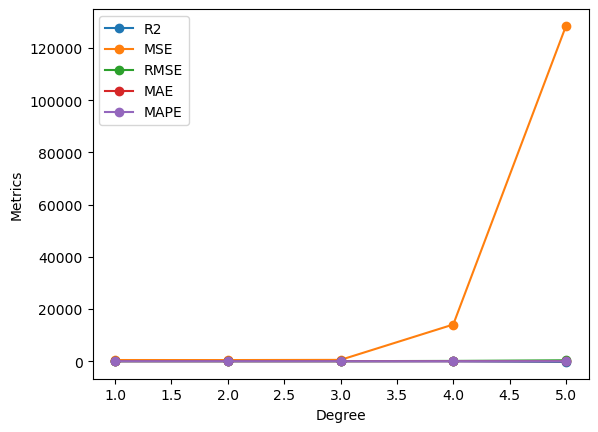

In [10]:
plt.plot(degree, r2_list, marker="o", label="R2")
plt.plot(degree, mse_list, marker="o", label="MSE")
plt.plot(degree, rmse_list, marker="o", label="RMSE")
plt.plot(degree, mae_list, marker="o", label="MAE")
plt.plot(degree, mape_list, marker="o", label="MAPE")
plt.xlabel("Degree")
plt.ylabel("Metrics")
plt.legend()

In [11]:
best_degree = degree[np.argmin(mse_list)]
best_degree

2

### Alpha

In [12]:
alpha = np.arange(0, 5, 0.2)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [13]:
for i in alpha:
    # Define Polynomial Model
    poly = PolynomialFeatures(degree=best_degree )
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    # Define Ridge Model
    poly_ridge = Ridge(random_state=42, alpha=i)

    # Fit Model
    poly_ridge.fit(X_poly_train, y_train)

    # Predict
    y_pred = poly_ridge.predict(X_poly_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = mt.mean_squared_error(y_val, y_pred, squared= False)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

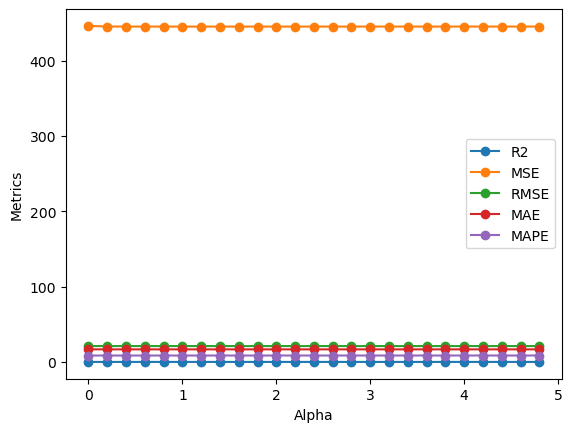

In [14]:
plt.plot(alpha, r2_list, marker="o", label="R2")
plt.plot(alpha, mse_list, marker="o", label="MSE")
plt.plot(alpha, rmse_list, marker="o", label="RMSE")
plt.plot(alpha, mae_list, marker="o", label="MAE")
plt.plot(alpha, mape_list, marker="o", label="MAPE")
plt.xlabel("Alpha")
plt.ylabel("Metrics")
plt.legend()

In [15]:
best_alpha = alpha[np.argmin(mse_list)]
best_alpha

1.2000000000000002

### Max Iter

In [16]:
max_iter = np.arange(400, 2100, 100)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [17]:
for i in max_iter:
    # Define Polynomial Model
    poly = PolynomialFeatures(degree=best_degree )
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    # Define Lasso Model
    poly_ridge = Ridge(random_state=42, alpha= best_alpha, max_iter=i)

    # Fit Model
    poly_ridge.fit(X_poly_train, y_train)

    # Predict
    y_pred = poly_ridge.predict(X_poly_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = mt.mean_squared_error(y_val, y_pred, squared= False)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

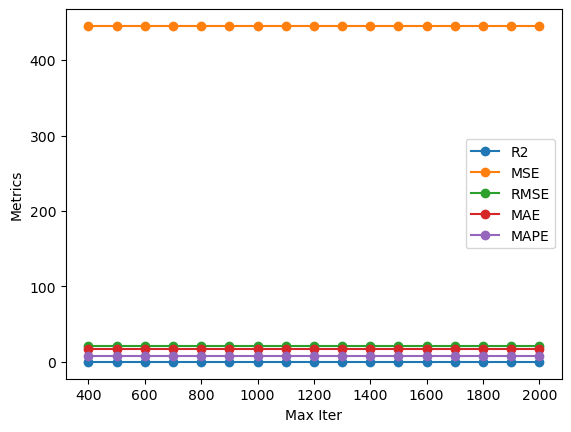

In [18]:
plt.plot(max_iter, r2_list, marker="o", label="R2")
plt.plot(max_iter, mse_list, marker="o", label="MSE")
plt.plot(max_iter, rmse_list, marker="o", label="RMSE")
plt.plot(max_iter, mae_list, marker="o", label="MAE")
plt.plot(max_iter, mape_list, marker="o", label="MAPE")
plt.xlabel("Max Iter")
plt.ylabel("Metrics")
plt.legend()

In [19]:
best_max_iter = max_iter[np.argmin(mse_list)]
best_max_iter

400

## 2.4 Test Performance

In [20]:
# Define Polynomial Model
poly = PolynomialFeatures(degree=best_degree )
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)


# Define Lasso Model
poly_ridge = Ridge(random_state=42, alpha= best_alpha, max_iter=best_max_iter)

# Fit Model
poly_ridge.fit(np.concatenate((X_poly_train, X_poly_val)),np.concatenate((y_train, y_val)))

# Predict
y_pred_test = poly_ridge.predict(X_poly_test)

# Performance Metrics
r2_test = mt.r2_score(y_test, y_pred_test)
mse_test = mt.mean_squared_error(y_test, y_pred_test)
rmse_test = mt.mean_squared_error(y_test, y_pred_test, squared= False)
mae_test = mt.mean_absolute_error(y_test, y_pred_test)
mape_test = mt.mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Test R2: {r2_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}")

Test R2: 0.09007962459311813
Test MSE: 443.0411187651684
Test RMSE: 21.048541962928653
Test MAE: 16.743749090801646
Test MAPE: 8.31191006788579


# 3.0 Results

In [ ]:
train_metrics = {
    "Algorithm": "Polynomial Regression - Ridge",
    "R2": np.round(r2_train, 3),
    "MSE": np.round(mse_train, 3),
    "RMSE": np.round(rmse_train, 3),
    "MAE": np.round(mae_train, 3),
    "MAPE": np.round(mape_train, 3),
}
validation_metrics = {
    "Algorithm": "Polynomial Regression - Ridge",
    "R2": np.round(r2_val, 3),
    "MSE": np.round(mse_val, 3),
    "RMSE": np.round(rmse_val, 3),
    "MAE": np.round(mae_val, 3),
    "MAPE": np.round(mape_val, 3),
}
test_metrics = {
    "Algorithm": "Polynomial Regression - Ridge",
    "R2": np.round(r2_test, 3),
    "MSE": np.round(mse_test, 3),
    "RMSE": np.round(rmse_test, 3),
    "MAE": np.round(mae_test, 3),
    "MAPE": np.round(mape_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./reg_train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./reg_validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./reg_test_metrics.csv", mode="a", header=False
)